In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
df=pd.read_csv("./2-multiplegradesdataset.csv")
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study Hours,50.0,3.668,1.401230,1.1,2.675,3.60,4.500,6.8
Sleep Hours,50.0,7.022,0.874419,4.4,6.500,7.05,7.575,8.6
Attendance Rate,50.0,89.736,4.924813,80.4,85.625,90.10,92.550,100.0
Social Media Hours,50.0,3.090,0.896990,1.5,2.225,3.20,3.575,5.7
Exam Score,50.0,76.070,11.709150,56.9,68.075,73.55,84.175,100.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


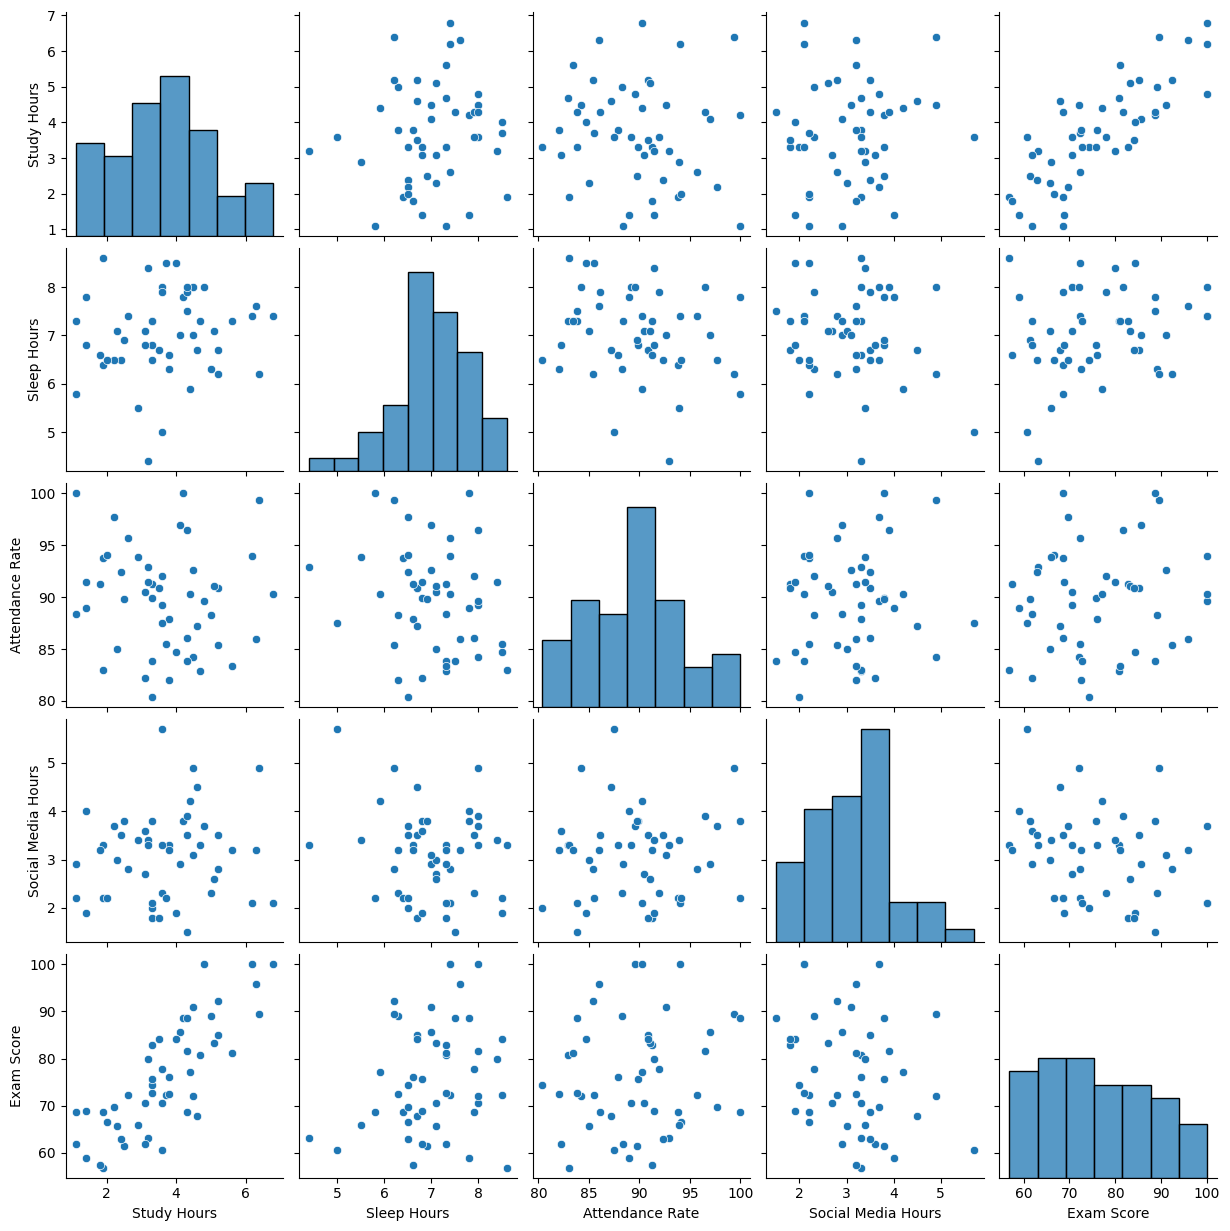

In [6]:
sns.pairplot(df)
plt.show()

<Axes: >

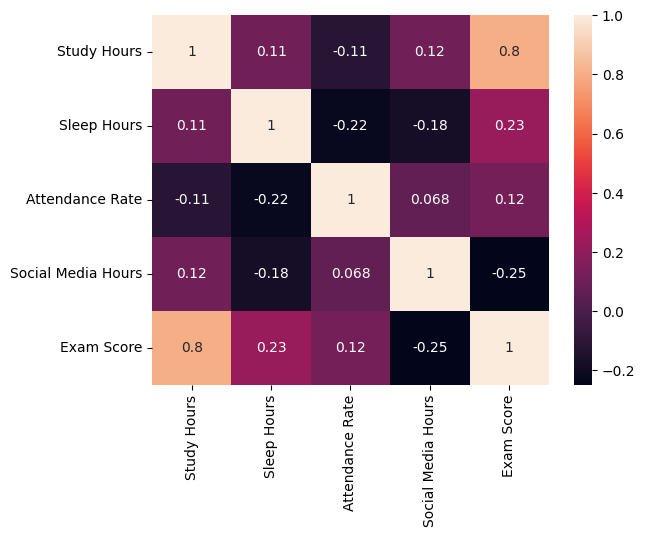

In [7]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['Study Hours', 'Sleep Hours', 'Attendance Rate', 'Social Media Hours',
       'Exam Score'],
      dtype='object')

In [15]:
#independent & Depended Features

X=df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y=df["Exam Score"]

In [16]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [19]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [20]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [21]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [29]:
new_student=[[5,7,90,4]]

In [30]:
new_student_scaled=scaler.transform(new_student)
regression.predict(new_student_scaled)

c:\Users\peker\Desktop\DataScience\dsvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([82.23465969])

In [32]:
#prediction quality

y_pred=regression.predict(X_test)

In [33]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print(mse)
print(mae)


14.600589378986278
3.2770264859627876


In [36]:
r2=r2_score(y_test,y_pred)
r2

0.9156707345772709

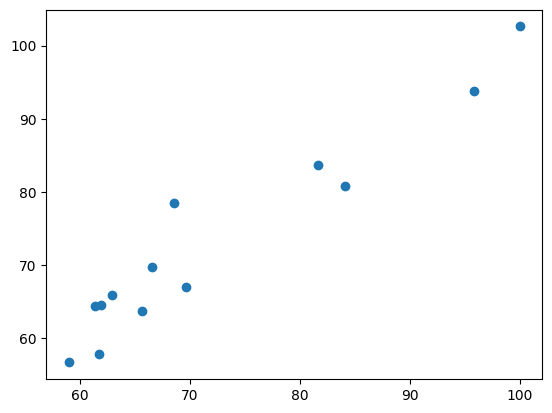

In [37]:
plt.scatter(y_test,y_pred)
